In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
sys.path.append("../ComSub")
from ECI  import *
import re
from collections import defaultdict, Counter
from datetime import datetime as dt
p1 = re.compile(r'[<](.*?)[>]', re.S)  #最小匹配

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_dict(lst):
    return dict(zip(list(set(lst)),range(len(set(lst)))))

In [389]:
data = pd.read_csv("./Posts_phys_wt.csv")
# wt = []
# nan  = data.AcceptedAnswerId[7]
# for i in data.index:
#     if data.PostTypeId[i]==1 and not np.isnan(data.AcceptedAnswerId[i]):
#         time1 = data.CreationDate[i][:-4]
#         time2 = list(data[data.Id==data.AcceptedAnswerId[i]].CreationDate)[0][:-4]
#         delta = dt.strptime(time2,'%Y-%m-%dT%H:%M:%S')-dt.strptime(time1,'%Y-%m-%dT%H:%M:%S')
#         delta = int(delta.seconds/60)
#     else:
#         delta = np.NaN
#     wt.append(delta)
# data['WaitingTime']=wt
# data.to_csv ("./Posts_phys_wt.csv", index = None, header=True)

In [390]:
data.head()

,PostTypeId,Id,OwnerUserId,CreationDate,AcceptedAnswerId,Tags,ParentId,Score,CommentCount,ViewCount,AnswerCount,FavoriteCount,Title,Body,WaitingTime
0,1,1,7.0,2010-11-02T18:59:01.140,5.0,<quantum-mechanics><particle-physics><angular-...,NaN,68,5,12383.0,4.0,23.0,What is spin as it relates to subatomic partic...,<p>I often hear about subatomic particles havi...,16.0
1,1,2,23.0,2010-11-02T19:09:48.680,5704.0,<particle-physics><string-theory>,NaN,27,3,2276.0,4.0,8.0,What is your simplest explanation of the strin...,<p>How would you explain string theory to non ...,804.0
2,1,3,40.0,2010-11-02T19:11:05.857,180.0,<particle-physics><group-theory><representatio...,NaN,32,5,2113.0,3.0,12.0,"Lie theory, Representations and particle physics",<p>This is a question that has been posted at ...,120.0
3,2,4,20.0,2010-11-02T19:12:26.543,NaN,NaN,1.0,19,2,NaN,NaN,NaN,NaN,<p>Imagine going to the rest frame of a massiv...,NaN
4,2,5,13.0,2010-11-02T19:15:20.813,NaN,NaN,1.0,42,0,NaN,NaN,NaN,NaN,<p>Spin is a technical term specifically refer...,NaN


存在的关系
- 提问者-问题 
- 回答者-问题
- 回答者-tag的关系

In [391]:
#找到所有的问题和回答
Question = data[data.PostTypeId==1]
Answer = data[data.PostTypeId==2]

In [143]:
#所有问题的标签
Qid_tags =  {Question.Id[i]:p1.findall(Question.Tags[i]) for i in Question.index}

In [144]:
# 所有标签的列表
taglist = list(set([t for i in Qid_tags for t in Qid_tags[i]]))
dtag = dict(zip(taglist,range(len(taglist))))

In [146]:
AnswerUserTag = defaultdict(lambda:defaultdict(lambda: 0))
for i in Answer.index:
    user = Answer.OwnerUserId[i]
    qid = int(Answer.ParentId[i])
    if qid in Qid_tags:
        for tag in Qid_tags[qid]:
            AnswerUserTag[user][tag]+=1


In [147]:
user_tag = [[user,tag,AnswerUserTag[user][tag]] for user in AnswerUserTag for tag in  AnswerUserTag[user]]

In [148]:
x = [a for a,b,c in user_tag]
y = [b for a,b,c in user_tag]
z = [c for a,b,c in user_tag]

In [150]:
dx = get_dict(x)
dy = get_dict(y)
xlist = [dx[a] for a in x]
ylist = [dy[b] for b in y]

In [151]:
from scipy import sparse
nx,ny=len(dx),len(dy)
M = sparse.csc_matrix((z,(xlist,ylist)),shape=(nx,ny))

In [152]:
R = RCA_sparse(M)
D = Get_eci_pci_sparse(R)

==Time 3.73==
==Time 0.14==


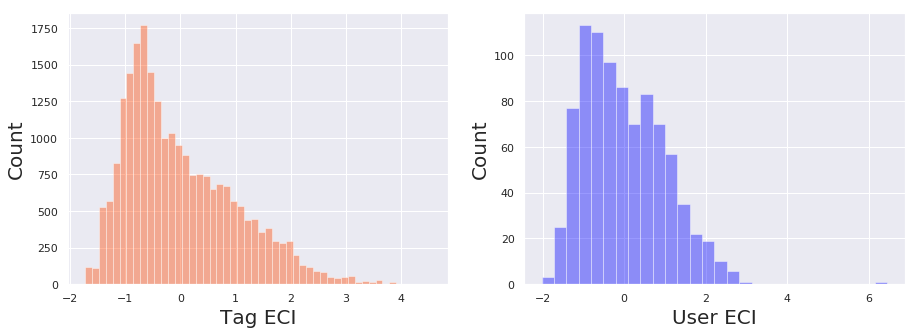

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(D['eci'],kde=False,color="orangered",)
plt.xlabel('Tag ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(122)
sns.distplot(D['pci'],kde=False,color="blue",)
plt.xlabel('User ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [154]:
res = [(key,D['pci'][dy[key]]) for key in dy]
Res = sorted(res,key=lambda  x:x[1],reverse=True)
Res[:20]

[('quantum-error-correction', 6.463757587406002),
 ('wightman-fields', 3.1221173276601535),
 ('affine-lie-algebra', 2.7604364301223097),
 ('superspace-formalism', 2.560976989989733),
 ('hopf-algebra', 2.5479013559563892),
 ('large-n', 2.546982098617455),
 ('algebraic-topology', 2.5359186633548023),
 ('amplituhedron', 2.5287466772888827),
 ('sigma-models', 2.509364795728365),
 ('string-field-theory', 2.5078306313353913),
 ('calabi-yau', 2.3875774723484313),
 ('topological-defects', 2.382500742747014),
 ('skyrmion', 2.3471149233650954),
 ('brst', 2.337258295839197),
 ('research-level', 2.3182699482268054),
 ('chern-simons-theory', 2.2951913128778414),
 ('conformal-field-theory', 2.271234211357312),
 ('supersymmetry', 2.259894261726987),
 ('superconformality', 2.2021466813934825),
 ('non-commutative-geometry', 2.14605407742623)]

In [155]:
Res[-20:]

[('aircraft', -1.4849019487784323),
 ('drag', -1.4908179351006468),
 ('water', -1.4932421937930964),
 ('humidity', -1.4959362367879132),
 ('contact-mechanics', -1.5064492044506188),
 ('lift', -1.512611677321254),
 ('bernoulli-equation', -1.51976164121583),
 ('electricity', -1.5630536315786463),
 ('electrical-resistance', -1.5664219316478243),
 ('pressure', -1.5667629124821618),
 ('everyday-life', -1.569747586758768),
 ('fluid-dynamics', -1.586555976440661),
 ('aerodynamics', -1.599324971465454),
 ('free-body-diagram', -1.627645113727728),
 ('electric-circuits', -1.6570894398813922),
 ('forces', -1.664724621237131),
 ('friction', -1.6655668624243072),
 ('telescopes', -1.8129050499919555),
 ('newtonian-mechanics', -1.829506545246723),
 ('fracture', -2.025059425989051)]

# 利用userid-questionid

In [ ]:
考虑的问题 需要去处理那些被accepted的问题

In [394]:
Question1 =  Question.dropna(subset=["OwnerUserId"])
Answer1 =  Answer.dropna(subset=["OwnerUserId","ParentId"])

In [395]:
Question1.head()

,PostTypeId,Id,OwnerUserId,CreationDate,AcceptedAnswerId,Tags,ParentId,Score,CommentCount,ViewCount,AnswerCount,FavoriteCount,Title,Body,WaitingTime
0,1,1,7.0,2010-11-02T18:59:01.140,5.0,<quantum-mechanics><particle-physics><angular-...,NaN,68,5,12383.0,4.0,23.0,What is spin as it relates to subatomic partic...,<p>I often hear about subatomic particles havi...,16.0
1,1,2,23.0,2010-11-02T19:09:48.680,5704.0,<particle-physics><string-theory>,NaN,27,3,2276.0,4.0,8.0,What is your simplest explanation of the strin...,<p>How would you explain string theory to non ...,804.0
2,1,3,40.0,2010-11-02T19:11:05.857,180.0,<particle-physics><group-theory><representatio...,NaN,32,5,2113.0,3.0,12.0,"Lie theory, Representations and particle physics",<p>This is a question that has been posted at ...,120.0
5,1,7,23.0,2010-11-02T19:26:38.137,46.0,<quantum-mechanics><quantum-interpretations><h...,NaN,10,5,1849.0,6.0,5.0,Will Determinism be ever possible?,<p>What are the main problems that we need to ...,87.0
7,1,9,48.0,2010-11-02T19:28:09.013,NaN,<lagrangian-formalism><variational-principle><...,NaN,39,1,6586.0,6.0,27.0,Hamilton's Principle,<p>Hamilton's principle states that a dynamic ...,NaN


In [157]:
XY = [[int(Answer.OwnerUserId[i]), int(Answer.ParentId[i])] for i in Answer1.index]

In [158]:
x = [i  for  i,j  in XY]
y = [j  for  i,j  in XY]

In [159]:
Cx = Counter(x)
Cy= Counter(y)

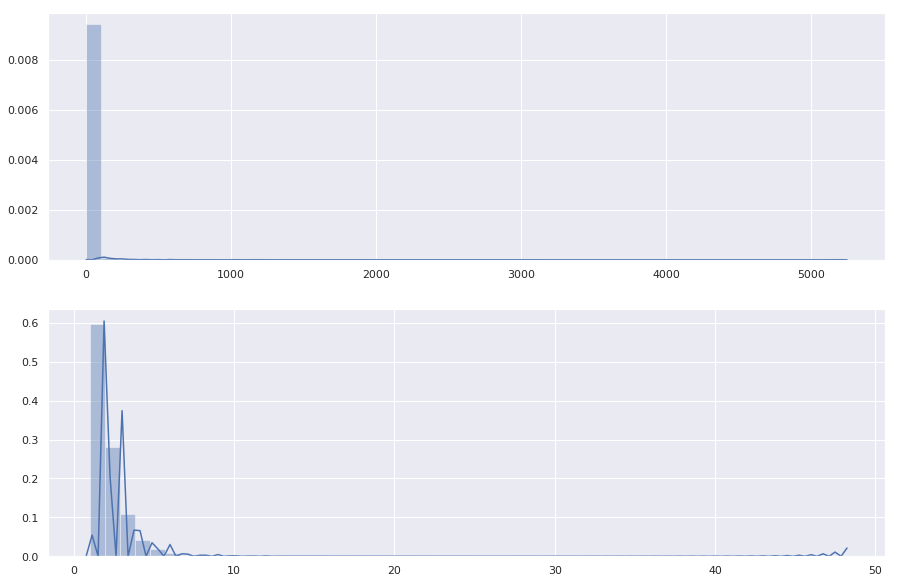

In [177]:
plt.figure(figsize=(15,10))
plt.subplot(211)
sns.distplot(list(Cx.values()))
plt.subplot(212)
sns.distplot(list(Cy.values()))

In [185]:
removex = [i for i in Cx if Cx[i]<=2]
removey = [i for i in Cy if Cy[i]<=3]
XY1 = []
n=0
N=len(XY)
for xi,yi in XY:
    if xi not in removex and yi not in removey:
        XY1.append([xi,yi])
    n+=1
    if n%1000==0:
        print(n*1.0/N,end='\r')

In [186]:
x = [i  for  i,j  in XY1]
y = [j  for  i,j  in XY1]
dx = get_dict(x)
dy = get_dict(y)
xlist = [dx[a] for a in x]
ylist = [dy[b] for b in y]
len(dx),len(dy)

(3626, 6694)

In [187]:
nx,ny=len(dx),len(dy)
M = sparse.csc_matrix(([1.]*len(xlist),(xlist,ylist)),shape=(nx,ny))

In [207]:
R = RCA_sparse(M)
#D = Get_eci_pci_sparse(R)

/home/superman/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:282: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


==Time 3.83==


In [222]:
@timelogger
def Get_eci_pci(M):
    d = M.sum(1).T.tolist()[0]
    u = M.sum(0).tolist()[0]
    D = np.diag([1.0/i if i>0 else 0. for i in d])
    U = np.diag([1.0/i if i>0 else 0. for i in u])
    mcp1 = D * M
    mcp2 = M * U
    
    Mcc = mcp1 * mcp2.T
    Mpp = mcp2.T * mcp1
    eigvals, eigvecs = np.linalg.eig(Mpp)
    eigvecs = np.real(eigvecs)
    # Get eigenvector corresponding to second largest eigenvalue
    eig_index = eigvals.argsort()[-2]
    kp = eigvecs[:, eig_index]
    kc = mcp1 @ kp
    s1 = np.sign(np.corrcoef(M.sum(1).reshape(-1), kc.reshape(-1))[0, 1])
    eci = s1 * kc
    pci = s1 * kp  
    return {'eci':eci.T.tolist()[0],'pci':pci.T.tolist()[0]}

In [462]:
D = Get_eci_pci_sparse(M)

==Time 1.03==


In [463]:
eci = D['eci']
pci = D['pci']
# eci[abs(eci)>0.025]=0.025
# pci[abs(pci)>0.025]=0.025

In [286]:
eci

array([0.00498345, 0.00498345, 0.00498345, ..., 0.00498345, 0.00498345,
       0.00498345])

In [478]:
def filter_extream(eci):
    mark1 =0
    mark2 =0
    n=0
    seci = sorted(eci,reverse=True)
    for i in range(1,len(seci)):
        if seci[i]/seci[i-1]<1:
            mark1 = seci[i]
            break
    seci = sorted(eci)
    for i in range(1,len(seci)):
        if seci[i]/seci[i-1]>1:
            mark2 = seci[i]
            break
    eci[eci>mark1]=mark1
    eci[eci<mark2]=mark2
    return eci

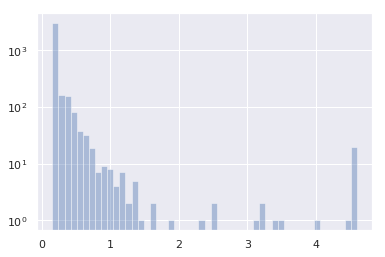

In [491]:
eci1 =  filter_extream(eci)
eci1 = Get_z_score(eci1)
eci1 =  filter_extream(eci1)
eci1 =  filter_extream(eci1)
eci1 =  filter_extream(eci1)
eci1 =  filter_extream(eci1)
eci1 =  filter_extream(eci1)
eci1 =  filter_extream(eci1)
sns.distplot(eci1,kde=False)
plt.yscale('log')

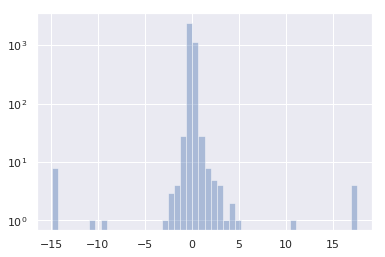

In [284]:
sns.distplot(Get_z_score(eci),kde=False)
plt.yscale('log')

In [285]:
Get_z_score(eci)

array([-0.30328026,  0.84437662,  0.02108168, ...,  0.02108168,
        0.66980554,  0.07101196])

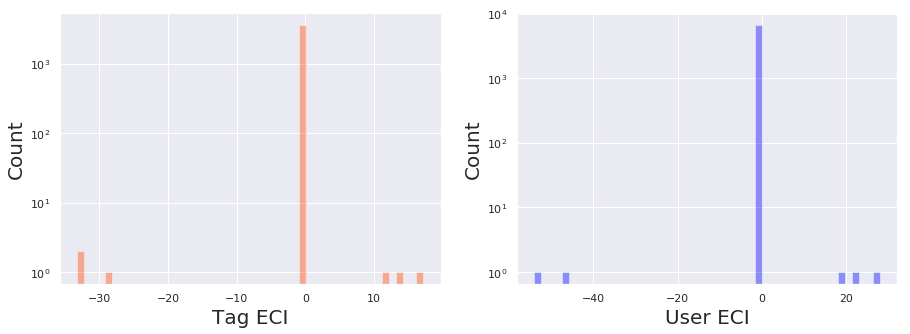

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.yscale('log')
sns.distplot(D['eci'],kde=False,color="orangered",)
plt.xlabel('Tag ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(122)
sns.distplot(D['pci'],kde=False,color="blue",)
plt.xlabel('User ECI',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.yscale('log')
plt.show()

In [493]:
pci1 = filter_extream(D['pci'])

In [494]:
SD =  sorted([[i,k]  for i,k in zip(range(len(pci1)),pci1)],key=lambda x:x[1],reverse=True)

In [495]:
qid = [i for i in dy.keys()]
qid2 = [dy[i] for i in qid]

In [496]:
id2origin=dict(zip(qid2,qid))

In [497]:
tmp =[]
for i,j in SD:
    if not np.isnan(list(data.loc[data['Id']==id2origin[i]].WaitingTime)[0]):
        WaitingTime = list(data.loc[data['Id']==id2origin[i]].WaitingTime)[0]
        ViewCount= list(data.loc[data['Id']==id2origin[i]].ViewCount)[0]
        AnswerCount = list(data.loc[data['Id']==id2origin[i]].AnswerCount)[0]
        TagCount = len(p1.findall(list(data.loc[data['Id']==id2origin[i]].Tags)[0]))
        tmp.append([id2origin[i],j,WaitingTime,ViewCount,AnswerCount,TagCount])

In [498]:
XYZ = np.array(tmp)

In [510]:
scipy.stats.spearmanr(XYZ[:,2],XYZ[:,3])#WaitingTime,ViewCount

SpearmanrResult(correlation=-0.11055045600052214, pvalue=1.2382929019430042e-11)

In [512]:
scipy.stats.spearmanr(XYZ[:,1],XYZ[:,4])#Weci,ViewCount

SpearmanrResult(correlation=0.03475164755294162, pvalue=0.03366598987833371)

(0, 1)

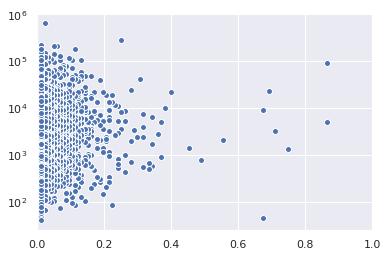

In [509]:
XYZ = np.array(tmp)
xx = filter_extream(Get_z_score(filter_extream(XYZ[:,1])))
plt.scatter(xx ,XYZ[:,3],edgecolors='w')
plt.yscale('log')
plt.xlim([0,1])

In [503]:
Counter(XYZ[:,1])

Counter({0.010624655924844427: 2,
         0.01062465592471337: 1,
         0.010624655924689074: 1,
         0.010624655924688675: 1,
         0.010624655924686607: 1,
         0.010624655924685882: 1,
         0.010624655924685556: 1,
         0.010624655924684612: 2,
         0.010624655924684142: 1,
         0.010624655924683996: 1,
         0.010624655924683923: 1,
         0.01062465592468385: 2,
         0.01062465592468338: 1,
         0.010624655924683125: 1,
         0.010624655924682981: 1,
         0.010624655924682763: 1,
         0.010624655924682692: 1,
         0.010624655924682655: 2,
         0.010624655924682619: 1,
         0.010624655924682546: 3,
         0.01062465592468251: 2,
         0.010624655924682437: 4,
         0.0106246559246824: 1,
         0.010624655924682364: 1,
         0.010624655924682327: 1,
         0.010624655924682293: 3,
         0.01062465592468222: 5,
         0.010624655924682183: 3,
         0.010624655924682147: 6,
         0.0106246559

In [404]:
[[id2origin[i],j,list(data.loc[data['Id']==id2origin[i]].WaitingTime)[0]] for i,j  in SD[-20:]]

[[171833, 0.00463578254617573, nan],
 [280324, 0.00463578254617573, 22.0],
 [144393, 0.00463578254617565, 40.0],
 [178169, 0.004635782546175008, 36.0],
 [169964, 0.004635782546173401, 522.0],
 [250912, 0.004635782546172679, nan],
 [248080, 0.004635782546172518, nan],
 [107209, 0.004635782546170912, nan],
 [251171, 0.0046357825461701896, 40.0],
 [321932, 0.004635782546169226, 243.0],
 [95259, 0.004635782546166496, nan],
 [231070, 0.004635782546162, nan],
 [207806, 0.0046357825461607145, nan],
 [108817, 0.004635782546160394, 222.0],
 [14535, 0.0046357825461598315, nan],
 [73571, 0.004635782546156058, nan],
 [145135, 0.00463578254615389, 24.0],
 [212986, 0.004635782546052236, 235.0],
 [261603, -46.170330928723, 18.0],
 [242126, -54.06230375073607, nan]]

In [216]:
data.loc[data['ParentId']==242126]

,PostTypeId,Id,OwnerUserId,CreationDate,AcceptedAnswerId,Tags,ParentId,Score,CommentCount,ViewCount,AnswerCount,FavoriteCount,Title,Body
175905,2,242129,99936.0,2016-03-08T00:22:59.040,NaN,NaN,242126.0,0,0,NaN,NaN,NaN,NaN,<p>the hexagonal prism consists of three unit ...
175909,2,242135,89246.0,2016-03-08T00:49:25.643,NaN,NaN,242126.0,0,1,NaN,NaN,NaN,NaN,<p>I understand it now.</p>\n\n<p>I was forget...
175917,2,242149,55863.0,2016-03-08T02:39:59.137,NaN,NaN,242126.0,1,0,NaN,NaN,NaN,NaN,<p>I hope this picture makes clearer both the ...
225100,2,309853,144437.0,2017-02-05T09:23:31.327,NaN,NaN,242126.0,1,0,NaN,NaN,NaN,NaN,<p>It can be viewed as a combination of three ...
